In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [41]:
### Importation des bibliothèques générales que nous utiliserons dans ce notebook
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.neighbors import KNeighborsClassifier

In [42]:
logs = pd.read_csv('/content/drive/MyDrive/MGL870/LOGS_DATASET/HDFS_2k.log_structured.csv',sep=",")

In [6]:
logs.head()

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate
0,1,81109,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,E10,PacketResponder <*> for block blk_<*> terminating
1,2,81109,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,E10,PacketResponder <*> for block blk_<*> terminating
2,3,81109,204005,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,E6,BLOCK* NameSystem.addStoredBlock: blockMap upd...
3,4,81109,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,E10,PacketResponder <*> for block blk_<*> terminating
4,5,81109,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,E10,PacketResponder <*> for block blk_<*> terminating


In [43]:
# Afin de faciliter l'accès aux colonnes et d'éviter les erreurs, on remplace les espaces par des underscores (_) dans les noms de colonnes.
logs.columns = [x.replace(' ', '_') for x in logs.columns]

In [44]:
logs.shape

(2000, 9)

In [45]:
# Combien de données avons-nous?
print(f'Nous avons {logs.shape[0]} lignes et {logs.shape[1]} colonnes.')

Nous avons 2000 lignes et 9 colonnes.


In [46]:
# Avons-nous des données manquantes?

missing_values = logs.isnull().sum()
print(missing_values)

LineId           0
Date             0
Time             0
Pid              0
Level            0
Component        0
Content          0
EventId          0
EventTemplate    0
dtype: int64


In [47]:
# Quels sont les types de caractéristiques (numériques vs catégorielles) ?
print(logs.dtypes)

LineId            int64
Date              int64
Time              int64
Pid               int64
Level            object
Component        object
Content          object
EventId          object
EventTemplate    object
dtype: object


In [48]:
# Quelle est la distribution de la variable `Level`?
print(logs['Level'].value_counts())

Level
INFO    1920
WARN      80
Name: count, dtype: int64


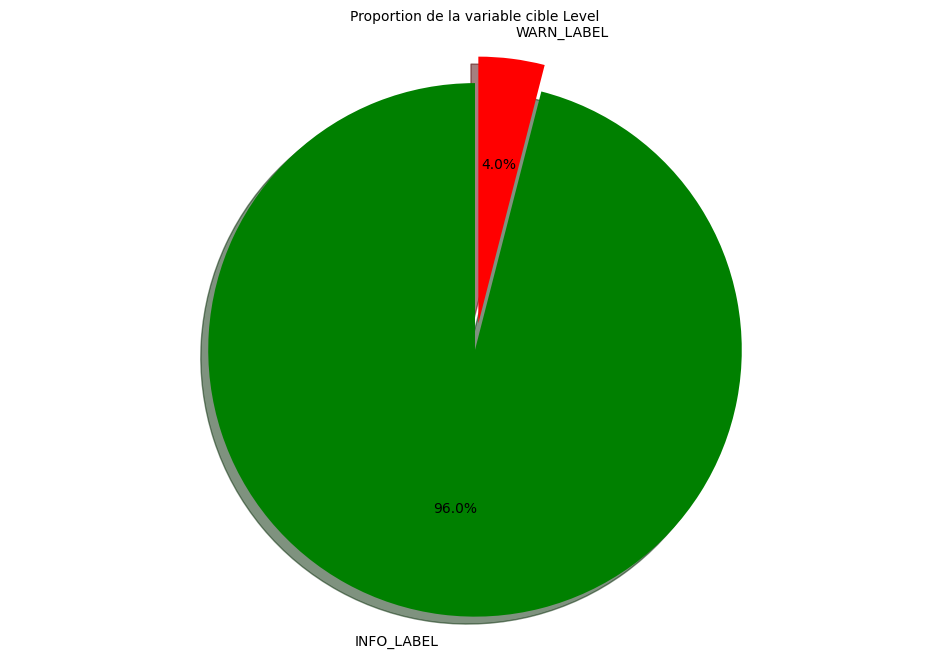

In [49]:
# Graphique en camembert pour afficher la répartition (en pourcentage) de la variable cible 'Level'
import matplotlib.pyplot as plt
labels = ['INFO_LABEL', 'WARN_LABEL']
sizes = [logs.Level[logs['Level']=='INFO'].count(), logs.Level[logs['Level']=='WARN'].count()]
explode = (0, 0.1)  # Longueur doit correspondre au nombre de labels
colors = ['#008000', '#FF0000']  # Deux couleurs pour deux labels

fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion de la variable cible Level", size=10)
plt.show()


In [50]:
# Quelle est la distribution de la variable `Component`?
print(logs['Component'].value_counts())

Component
dfs.FSNamesystem                659
dfs.DataNode$PacketResponder    603
dfs.DataNode$DataXceiver        454
dfs.FSDataset                   263
dfs.DataBlockScanner             20
dfs.DataNode                      1
Name: count, dtype: int64


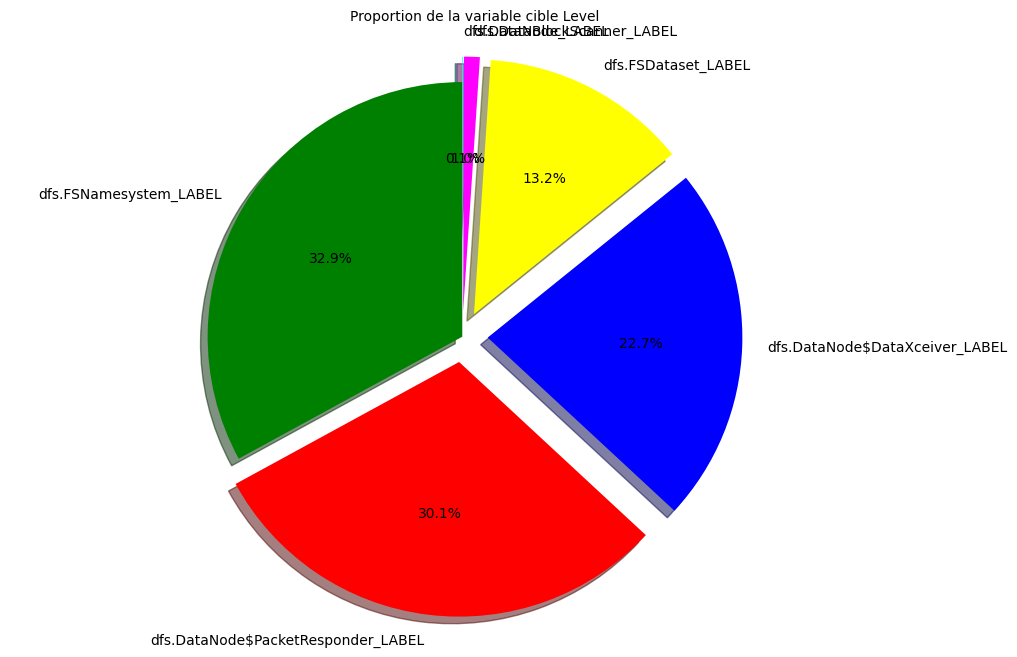

In [51]:
# Graphique en camembert pour afficher la répartition (en pourcentage) de la variable cible 'Component'
import matplotlib.pyplot as plt

labels = ['dfs.FSNamesystem_LABEL', 'dfs.DataNode$PacketResponder_LABEL', 'dfs.DataNode$DataXceiver_LABEL', 'dfs.FSDataset_LABEL', 'dfs.DataBlockScanner_LABEL', 'dfs.DataNode_LABEL']
sizes = [
    logs.Component[logs['Component']=='dfs.FSNamesystem'].count(),
    logs.Component[logs['Component']=='dfs.DataNode$PacketResponder'].count(),
    logs.Component[logs['Component']=='dfs.DataNode$DataXceiver'].count(),
    logs.Component[logs['Component']=='dfs.FSDataset'].count(),
    logs.Component[logs['Component']=='dfs.DataBlockScanner'].count(),
    logs.Component[logs['Component']=='dfs.DataNode'].count()
]
explode = (0, 0.1, 0.1, 0.1, 0.1, 0.1)  # Longueur correspondant aux labels
colors = ['#008000', '#FF0000', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF']  # Six couleurs pour six labels

fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion de la variable cible Level", size=10)
plt.show()


In [52]:
# Quelle est la distribution de la variable `Content`?
print(logs['Content'].value_counts())

Content
PacketResponder 1 for block blk_38865049064139660 terminating                                                                  1
BLOCK* NameSystem.addStoredBlock: blockMap updated: 10.251.203.166:50010 is added to blk_-2332150303475653460 size 67108864    1
Receiving block blk_345577139488306634 src: /10.251.37.240:38873 dest: /10.251.37.240:50010                                    1
PacketResponder 2 for block blk_-3363550789841756902 terminating                                                               1
PacketResponder 1 for block blk_4178945095089206682 terminating                                                                1
                                                                                                                              ..
Receiving block blk_6988110707613820142 src: /10.251.123.132:47658 dest: /10.251.123.132:50010                                 1
BLOCK* NameSystem.addStoredBlock: blockMap updated: 10.251.66.63:50010 is added to blk_-3

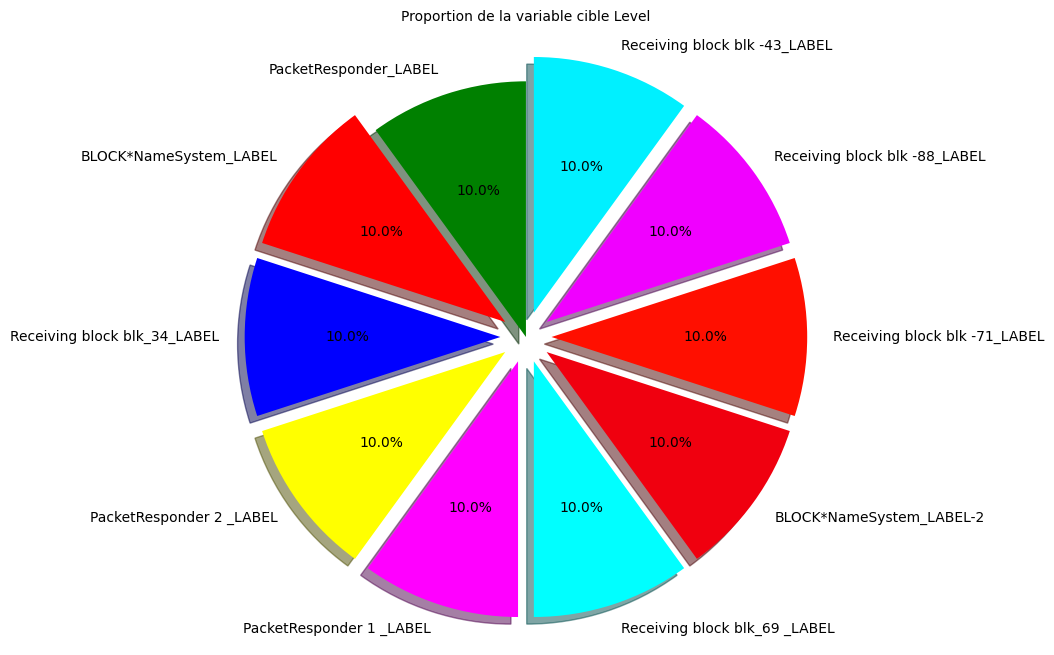

In [53]:
# Graphique en camembert pour afficher la répartition (en pourcentage) de la variable cible 'Level'
import matplotlib.pyplot as plt

labels = ['PacketResponder_LABEL',
          'BLOCK*NameSystem_LABEL',
          'Receiving block blk_34_LABEL',
          'PacketResponder 2 _LABEL',
          'PacketResponder 1 _LABEL',
          'Receiving block blk_69 _LABEL',
          'BLOCK*NameSystem_LABEL-2',
          'Receiving block blk -71_LABEL',
          'Receiving block blk -88_LABEL',
          'Receiving block blk -43_LABEL',

          ]
sizes = [
    logs.Content[logs['Content']=='PacketResponder 1 for block blk_38865049064139660 terminating'].count(),
    logs.Content[logs['Content']=='BLOCK* NameSystem.addStoredBlock: blockMap updated: 10.251.203.166:50010 is added to blk_-2332150303475653460 size 67108864'].count(),
    logs.Content[logs['Content']=='Receiving block blk_345577139488306634 src: /10.251.37.240:38873 dest: /10.251.37.240:50010'].count(),
    logs.Content[logs['Content']=='PacketResponder 2 for block blk_-3363550789841756902 terminating'].count(),
    logs.Content[logs['Content']=='PacketResponder 1 for block blk_4178945095089206682 terminating'].count(),
    logs.Content[logs['Content']=='Receiving block blk_6988110707613820142 src: /10.251.123.132:47658 dest: /10.251.123.132:50010'].count(),
    logs.Content[logs['Content']=='BLOCK* NameSystem.addStoredBlock: blockMap updated: 10.251.66.63:50010 is added to blk_-3170270010972115378 size 67108864'].count(),
    logs.Content[logs['Content']=='Receiving block blk_-719498947487451844 src: /10.251.125.193:52079 dest: /10.251.125.193:50010'].count(),
    logs.Content[logs['Content']=='Receiving block blk_-8852638972311349374 src: /10.251.107.227:46913 dest: /10.251.107.227:50010'].count(),
    logs.Content[logs['Content']=='Receiving block blk_4343207286455274569 src: /10.250.9.207:59759 dest: /10.250.9.207:50010'].count()
]
explode = (0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Longueur correspondant aux labels
colors = ['#008000', '#FF0000', '#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#F0000F', '#FF0F00', '#F000FF', '#00F0FF']  # Six couleurs pour six labels

fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion de la variable cible Level", size=10)
plt.show()

In [57]:
#Nous allons extraire les catégories de la colonne Content pour en comprendre les motifs.
# Convertir les valeurs en chaînes de caractères
logs['Content'] = logs['Content'].astype(str)

#print(logs['Content'])

# Extraire les motifs spécifiques des messages de Content
logs['EventCategory'] = logs['Content'].str.extract(r'(\w+\.\w+|\w+\s\w+|\w+\*)')[0]

# Afficher les catégories uniques
print(logs['EventCategory'].unique())


['PacketResponder 1' 'PacketResponder 0' 'BLOCK*' 'PacketResponder 2'
 'Received block' 'Receiving block' 'Verification succeeded'
 'Deleting block' '10.251' '10.250']


   LineId   Date    Time  Pid Level                     Component  \
0       1  81109  203615  148  INFO  dfs.DataNode$PacketResponder   
1       2  81109  203807  222  INFO  dfs.DataNode$PacketResponder   
2       3  81109  204005   35  INFO              dfs.FSNamesystem   
3       4  81109  204015  308  INFO  dfs.DataNode$PacketResponder   
4       5  81109  204106  329  INFO  dfs.DataNode$PacketResponder   

                                             Content EventId  \
0  PacketResponder 1 for block blk_38865049064139...     E10   
1  PacketResponder 0 for block blk_-6952295868487...     E10   
2  BLOCK* NameSystem.addStoredBlock: blockMap upd...      E6   
3  PacketResponder 2 for block blk_82291938032499...     E10   
4  PacketResponder 2 for block blk_-6670958622368...     E10   

                                       EventTemplate      EventCategory  \
0  PacketResponder <*> for block blk_<*> terminating  PacketResponder 1   
1  PacketResponder <*> for block blk_<*> terminati

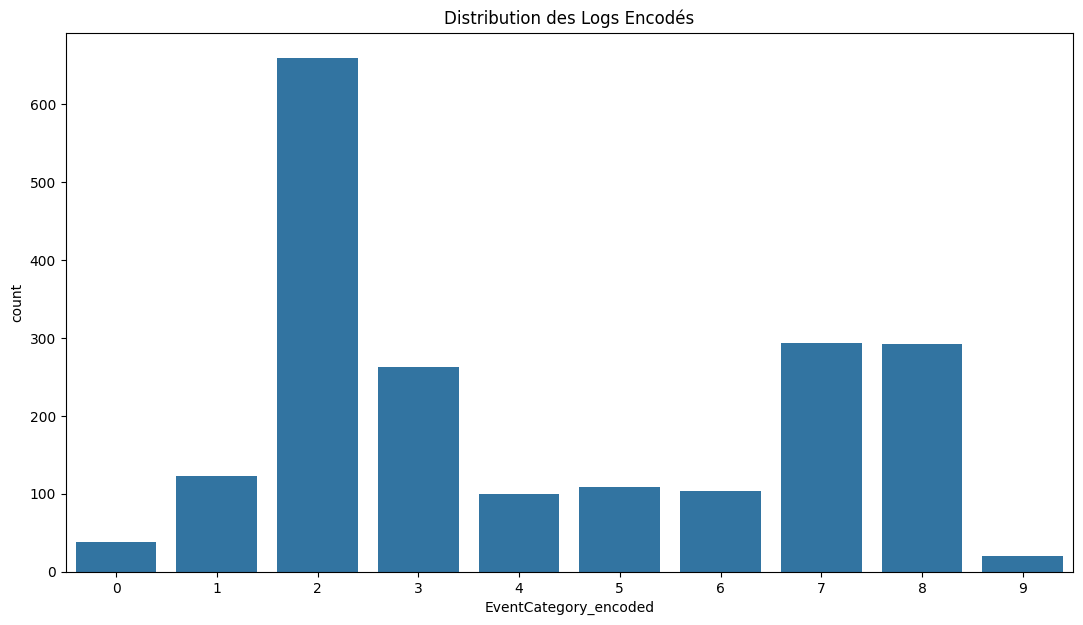

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialiser l'encodeur
le = LabelEncoder()

# Encoder la colonne `EventCategory`
logs['EventCategory_encoded'] = le.fit_transform(logs['EventCategory'])
print(logs.head())

# Visualiser les données encodées
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))

sns.countplot(data=logs, x='EventCategory_encoded')
plt.title('Distribution des Logs Encodés')
plt.show()




In [89]:
#Faisons la meme chose en utilisant seulement la variable categoriel content
#print(logs.select_dtypes(include=['object'])["Content"])
logs_content=logs.select_dtypes(include=['object'])["Content"]
# Convertir en DataFrame avec une colonne
logs_content_df = logs_content.to_frame(name='Content')

#Nous allons extraire les catégories de la colonne Content pour en comprendre les motifs.
# Convertir les valeurs en chaînes de caractères
logs_content_df = logs_content_df.astype(str)


# Convertir les valeurs en chaînes de caractères
logs_content_df['Content'] = logs_content_df['Content'].astype(str)

# Utiliser une expression régulière pour extraire les catégories principales
logs_content_df['EventCategory'] = logs_content_df['Content'].str.extract(r'(\w+\.\w+|\w+\s\w+|\w+\*)')[0]

# Remplacer les NaN par 'Unknown' sans utiliser inplace
logs_content_df['EventCategory'] = logs_content_df['EventCategory'].fillna('Unknown')

# Afficher les catégories uniques pour vérification
print(logs_content_df['EventCategory'].unique())


['PacketResponder 1' 'PacketResponder 0' 'BLOCK*' 'PacketResponder 2'
 'Received block' 'Receiving block' 'Verification succeeded'
 'Deleting block' '10.251' '10.250']


                                             Content      EventCategory  \
0  PacketResponder 1 for block blk_38865049064139...  PacketResponder 1   
1  PacketResponder 0 for block blk_-6952295868487...  PacketResponder 0   
2  BLOCK* NameSystem.addStoredBlock: blockMap upd...             BLOCK*   
3  PacketResponder 2 for block blk_82291938032499...  PacketResponder 2   
4  PacketResponder 2 for block blk_-6670958622368...  PacketResponder 2   

   EventCategory_encoded  
0                      5  
1                      4  
2                      2  
3                      6  
4                      6  


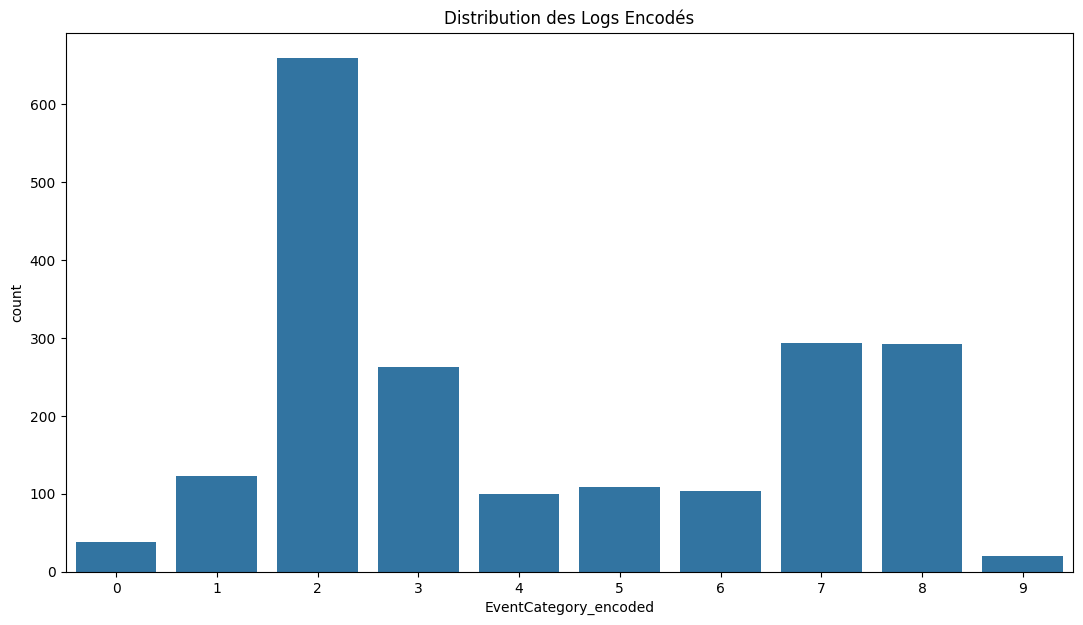

In [90]:
# Nous allons maintenant encode et visualiser la variable categoriel Content

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

le = LabelEncoder()
# Encoder la colonne `EventCategory`
logs_content_df['EventCategory_encoded'] = le.fit_transform(logs_content_df['EventCategory'])
# Afficher quelques lignes pour vérifier
print(logs_content_df.head())
# Visualiser les données encodées
plt.figure(figsize=(13, 7))
sns.countplot(data=logs_content_df, x='EventCategory_encoded')
plt.title('Distribution des Logs Encodés')
plt.show()

## **Pour ma variable categoriel "Content" je vais Séparer la partie statique du message de la partie dynamique (variables/paramètres)**


In [94]:
import pandas as pd
import re

# Charger les logs et extraire logs_content
logs_content = logs.select_dtypes(include=['object'])["Content"]

# Convertir en DataFrame avec une colonne
logs_content_df = logs_content.to_frame(name='Content')

# Convertir les valeurs en chaînes de caractères
logs_content_df['Content'] = logs_content_df['Content'].astype(str)

def separate_static_dynamic(message):
    # Utiliser une regex pour capturer les parties variables
    static_part = re.sub(r'blk_[\d-]+', '<BLOCK_ID>', message)
    static_part = re.sub(r'\b10\.\d{1,3}\.\d{1,3}\.\d{1,3}', '<IP_ADDRESS>', static_part)
    dynamic_part = re.findall(r'blk_[\d-]+|\b10\.\d{1,3}\.\d{1,3}\.\d{1,3}', message)
    return static_part, dynamic_part

# Appliquer la fonction à chaque message
logs_content_df[['StaticPart', 'DynamicPart']] = logs_content_df['Content'].apply(lambda x: pd.Series(separate_static_dynamic(x)))

# Représenter les parties statiques et dynamiques dans un DataFrame
dataset = logs_content_df[['Content', 'StaticPart', 'DynamicPart']]

# Afficher quelques lignes du dataset pour vérifier
dataset.head()




,Content,StaticPart,DynamicPart
0,PacketResponder 1 for block blk_38865049064139...,PacketResponder 1 for block <BLOCK_ID> termina...,[blk_38865049064139660]
1,PacketResponder 0 for block blk_-6952295868487...,PacketResponder 0 for block <BLOCK_ID> termina...,[blk_-6952295868487656571]
2,BLOCK* NameSystem.addStoredBlock: blockMap upd...,BLOCK* NameSystem.addStoredBlock: blockMap upd...,"[10.251.73.220, blk_7128370237687728475]"
3,PacketResponder 2 for block blk_82291938032499...,PacketResponder 2 for block <BLOCK_ID> termina...,[blk_8229193803249955061]
4,PacketResponder 2 for block blk_-6670958622368...,PacketResponder 2 for block <BLOCK_ID> termina...,[blk_-6670958622368987959]


In [20]:
# Quelle est la distribution de la variable `EventId`?
print(logs['EventId'].value_counts())

EventId
E6     314
E10    311
E11    292
E13    292
E9     263
E8     224
E7     115
E1      80
E3      80
E14     20
E4       5
E12      2
E2       1
E5       1
Name: count, dtype: int64


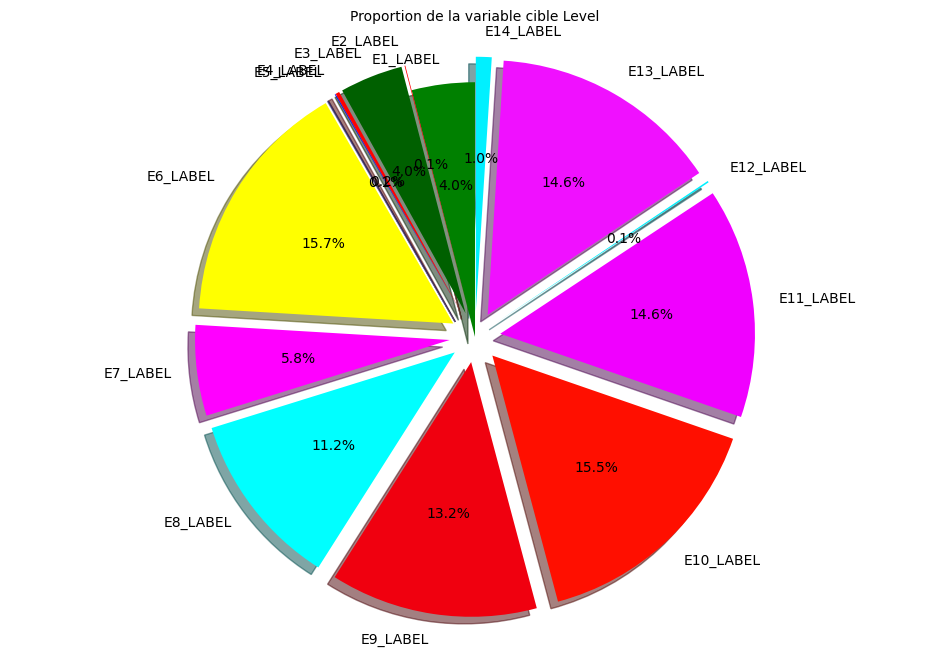

In [22]:
# Graphique en camembert pour afficher la répartition (en pourcentage) de la variable cible 'EventId'
import matplotlib.pyplot as plt
labels = ['E1_LABEL', 'E2_LABEL','E3_LABEL','E4_LABEL','E5_LABEL','E6_LABEL','E7_LABEL', 'E8_LABEL','E9_LABEL','E10_LABEL','E11_LABEL', 'E12_LABEL','E13_LABEL','E14_LABEL']
sizes = [logs.Level[logs['EventId']=='E1'].count(),
         logs.Level[logs['EventId']=='E2'].count(),
         logs.Level[logs['EventId']=='E3'].count(),
         logs.Level[logs['EventId']=='E4'].count(),
         logs.Level[logs['EventId']=='E5'].count(),
         logs.Level[logs['EventId']=='E6'].count(),
         logs.Level[logs['EventId']=='E7'].count(),
         logs.Level[logs['EventId']=='E8'].count(),
         logs.Level[logs['EventId']=='E9'].count(),
         logs.Level[logs['EventId']=='E10'].count(),
         logs.Level[logs['EventId']=='E11'].count(),
         logs.Level[logs['EventId']=='E12'].count(),
         logs.Level[logs['EventId']=='E13'].count(),
         logs.Level[logs['EventId']=='E14'].count(),
         ]
explode = (0, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)  # Longueur doit correspondre au nombre de labels
colors = ['#008000', '#FF0000','#006000', '#FF0100','#0000FF', '#FFFF00', '#FF00FF', '#00FFFF', '#F0000F', '#FF0F00', '#F000FF', '#00F0FF', '#F010FF', '#01F0FF']  # Deux couleurs pour deux labels

fig1, ax1 = plt.subplots(figsize=(12, 8))
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion de la variable cible Level", size=10)
plt.show()

In [17]:
# Quelle est la distribution de la variable `EventTemplate`?
print(logs['EventTemplate'].value_counts())

EventTemplate
BLOCK* NameSystem.addStoredBlock: blockMap updated: <*>:<*> is added to blk_<*> size <*>    314
PacketResponder <*> for block blk_<*> terminating                                           311
Received block blk_<*> of size <*> from /<*>                                                292
Receiving block blk_<*> src: /<*>:<*> dest: /<*>:<*>                                        292
Deleting block blk_<*> file /<*>/blk_<*>                                                    263
BLOCK* NameSystem.delete: blk_<*> is added to invalidSet of <*>:<*>                         224
BLOCK* NameSystem.allocateBlock: /<*>/part-<*>. blk_<*>                                     115
<*>:<*> Served block blk_<*> to /<*>                                                         80
<*>:<*>:Got exception while serving blk_<*> to /<*>:                                         80
Verification succeeded for blk_<*>                                                           20
BLOCK* ask <*>:<*> to dele

In [23]:
# Créer un dataframe séparé pour les variables Categoriel.

logs_cat = logs.select_dtypes(include=['object'])
logs_cat

,Level,Component,Content,EventId,EventTemplate
0,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,E10,PacketResponder <*> for block blk_<*> terminating
1,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,E10,PacketResponder <*> for block blk_<*> terminating
2,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,E6,BLOCK* NameSystem.addStoredBlock: blockMap upd...
3,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,E10,PacketResponder <*> for block blk_<*> terminating
4,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,E10,PacketResponder <*> for block blk_<*> terminating
...,...,...,...,...,...
1995,INFO,dfs.DataNode$DataXceiver,Receiving block blk_4198733391373026104 src: /...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...
1996,INFO,dfs.DataNode$PacketResponder,Received block blk_-5815145248455404269 of siz...,E11,Received block blk_<*> of size <*> from /<*>
1997,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-295306975763175640 src: /...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...
1998,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_52257196770490...,E10,PacketResponder <*> for block blk_<*> terminating


In [25]:
logs_cat.shape

(2000, 5)

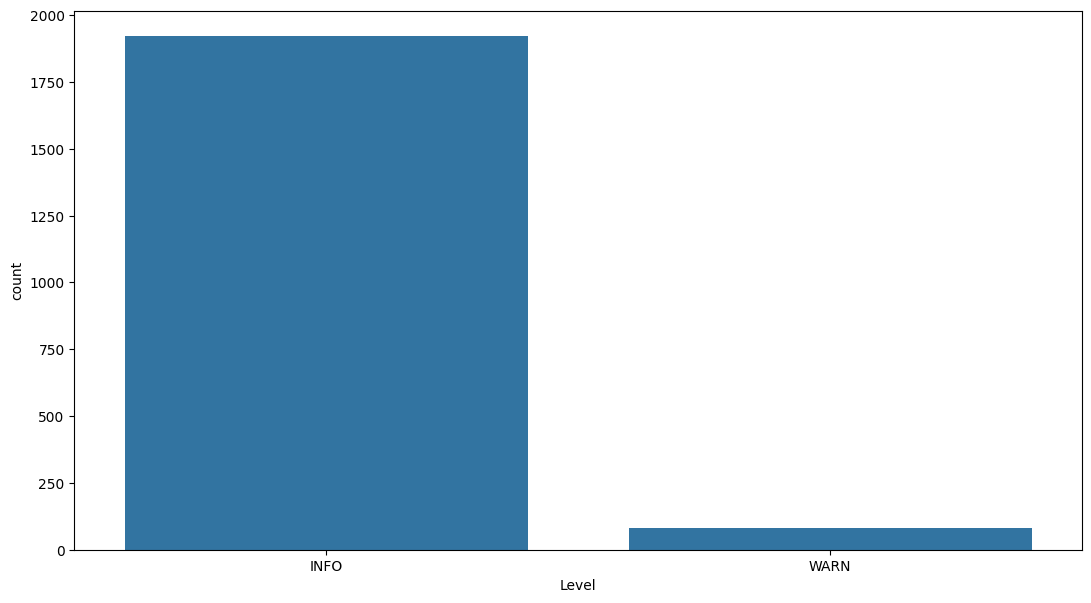

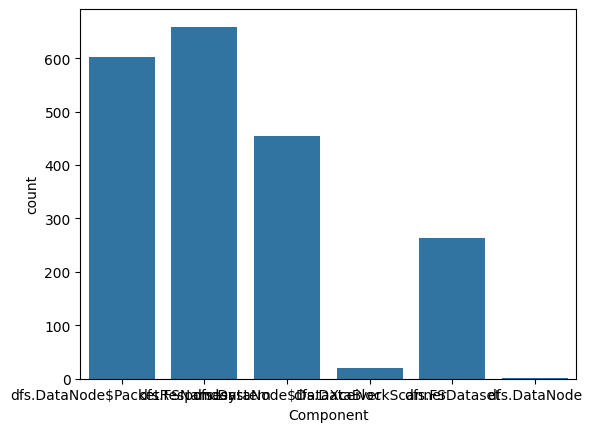

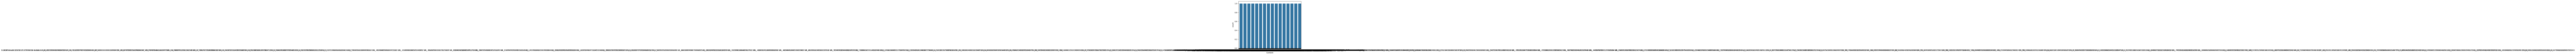

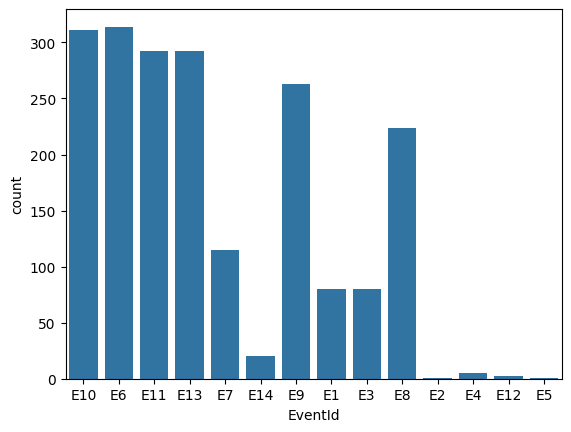

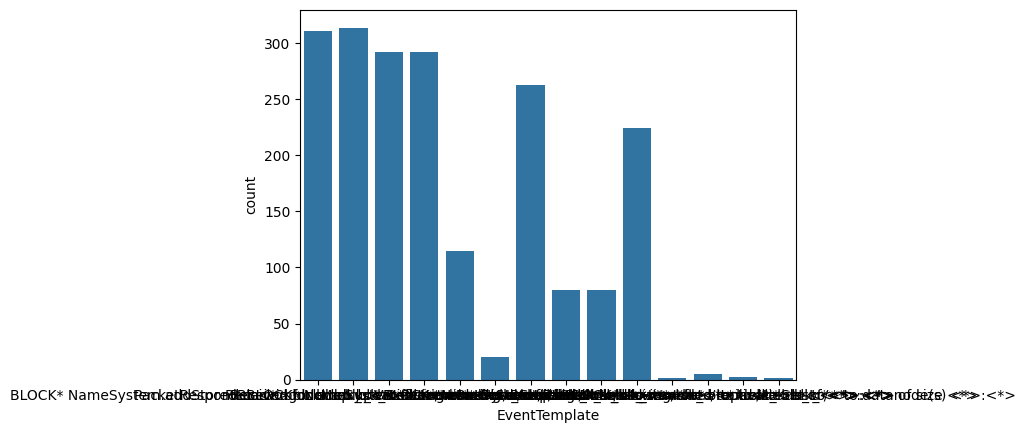

In [27]:
# visualisations adaptées aux données catégorielles,  count plots.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))

for i in logs_cat.columns:
    sns.countplot(data=logs, x=i)
    plt.show()


<ipython-input-28-c03fb9a45789>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


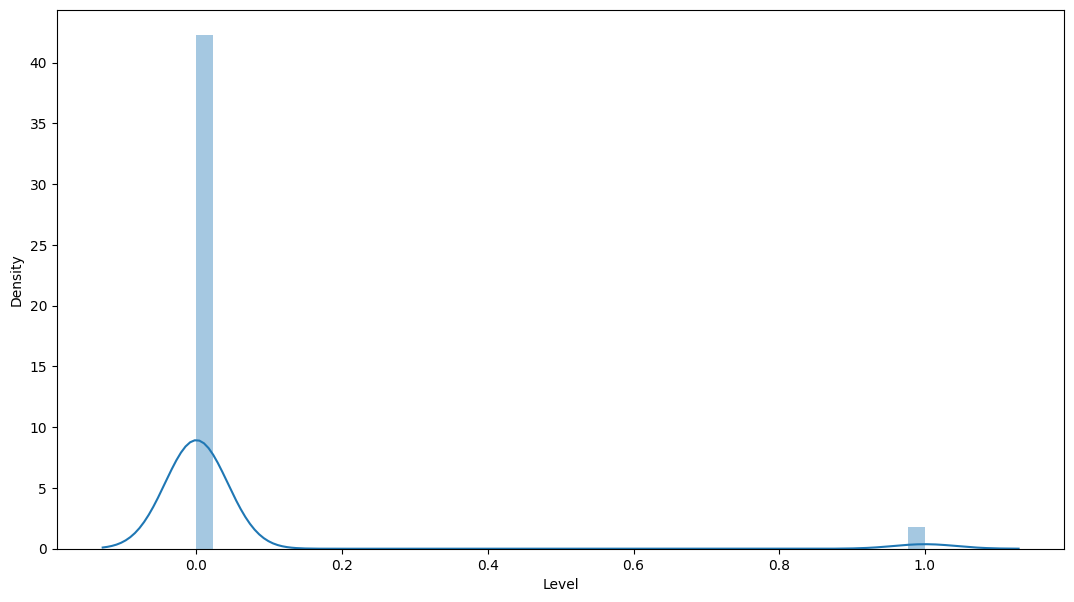

<ipython-input-28-c03fb9a45789>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


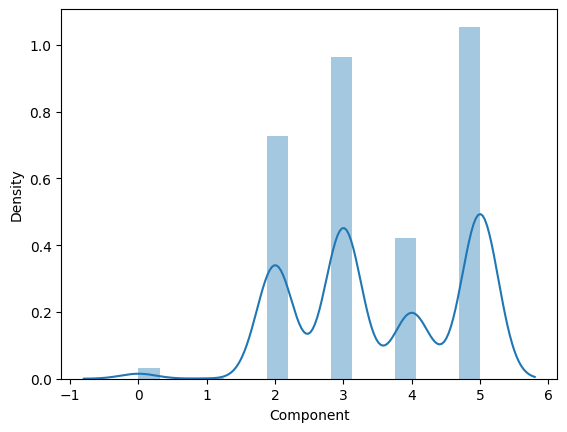

<ipython-input-28-c03fb9a45789>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


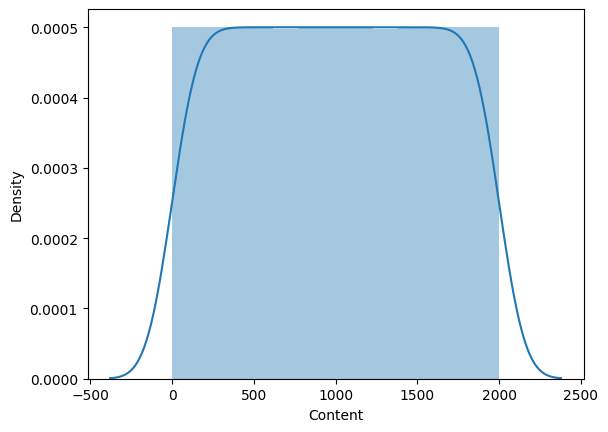

<ipython-input-28-c03fb9a45789>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


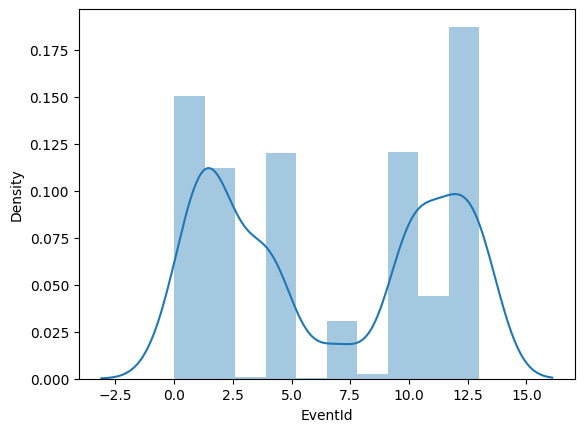

<ipython-input-28-c03fb9a45789>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


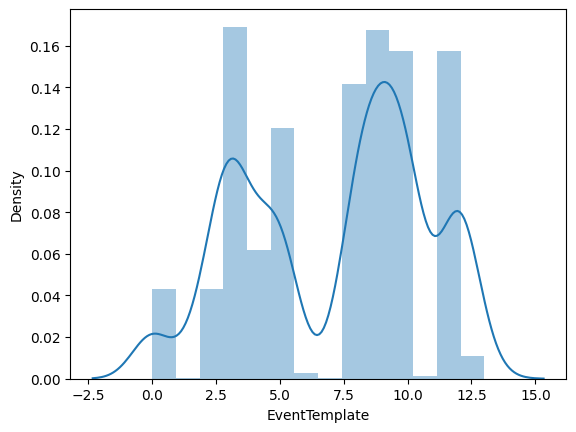

In [28]:
#convertion des valeurs catégoriel en valeurs numériques.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))

for i in logs_cat.columns:
    # Conversion des catégories en valeurs numériques
    logs[i] = logs[i].astype('category').cat.codes
    sns.distplot(logs[i])
    plt.show()


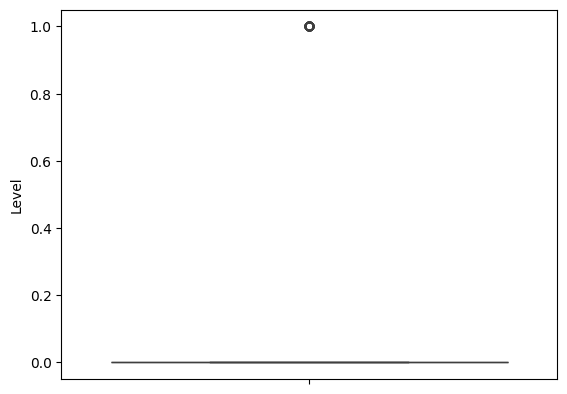

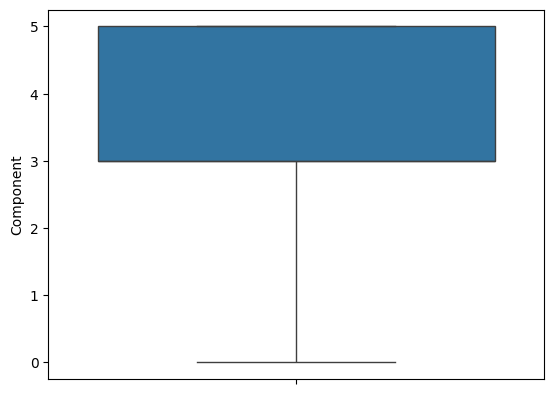

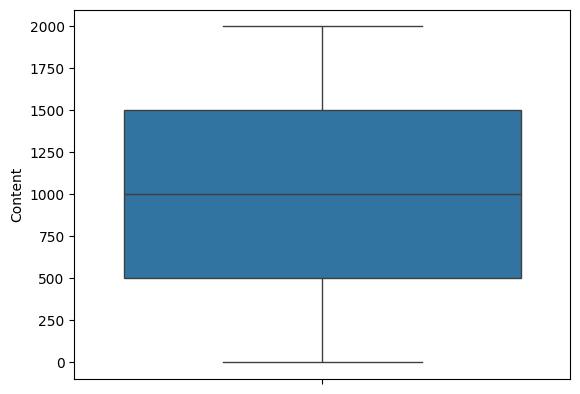

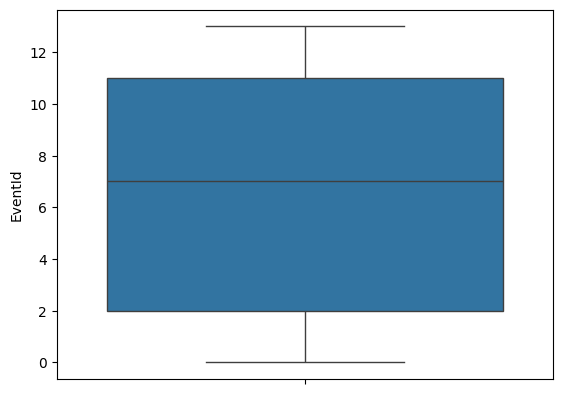

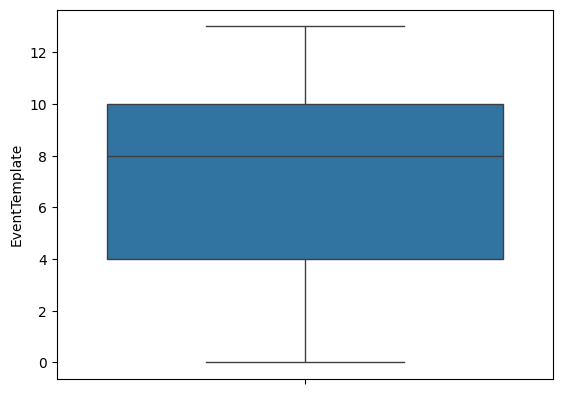

In [29]:
# BoxPlot
for i in logs_cat.columns:
    # Conversion des catégories en valeurs numériques
    logs[i] = logs[i].astype('category').cat.codes
    sns.boxplot(logs[i])
    plt.show()

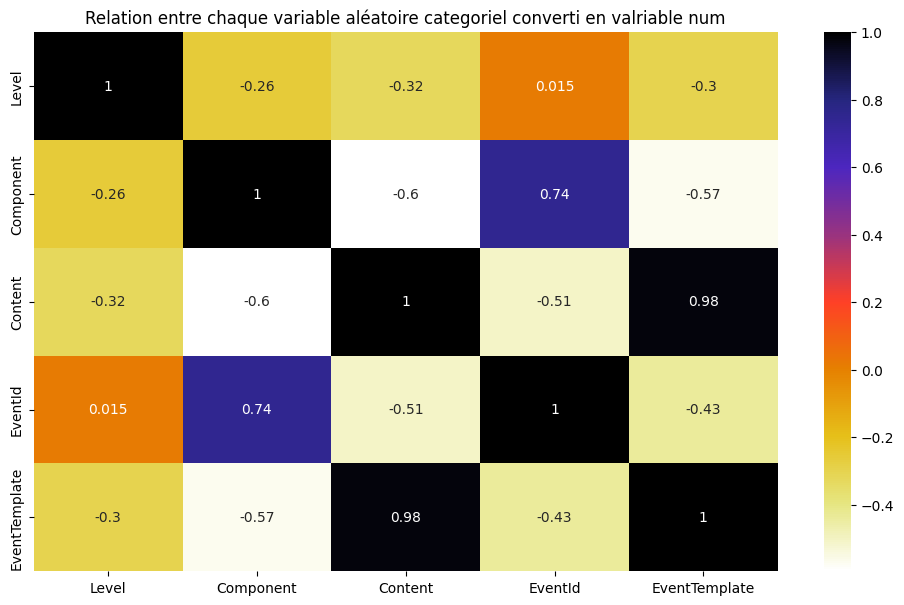

In [34]:
# Affichage à l'aide d'une carte thermique de la corrélation entre les variables categoriel converti en variable numériques

import seaborn as sns
import matplotlib.pyplot as plt
logs_cat_num=logs_cat
plt.figure(figsize=(12, 7))
for i in logs_cat.columns:
    # Conversion des catégories en valeurs numériques
    logs_cat_num[i] = logs_cat_num[i].astype('category').cat.codes

cor = logs_cat_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation entre chaque variable aléatoire categoriel converti en valriable num')
plt.show()

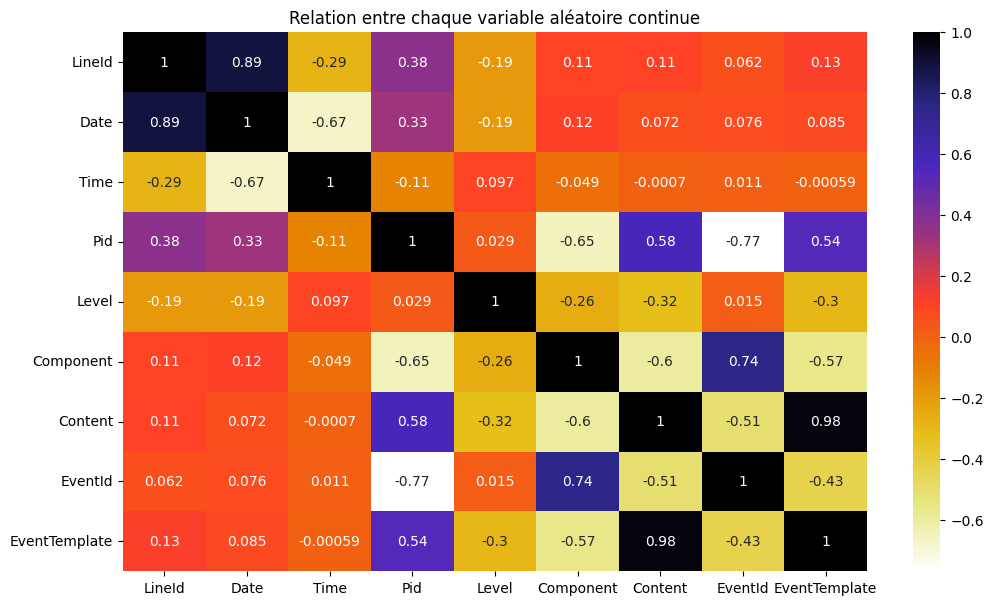

In [33]:
# Affichage  à l'aide d'une carte thermique de la corrélation entre les variables numériques et les variable categoriel convertie en valeur numerique

import seaborn as sns
import matplotlib.pyplot as plt
logs_cat_num=logs
plt.figure(figsize=(12, 7))
for i in logs_cat.columns:
    # Conversion des catégories en valeurs numériques
    logs_cat_num[i] = logs_cat_num[i].astype('category').cat.codes

cor = logs_cat_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation entre chaque variable aléatoire categoriel converti en valriable num et les variables num')
plt.show()

In [24]:
# Créer un dataframe séparé pour les variables numerique.

logs_num = logs.select_dtypes(include=['int64'])
logs_num

,LineId,Date,Time,Pid
0,1,81109,203615,148
1,2,81109,203807,222
2,3,81109,204005,35
3,4,81109,204015,308
4,5,81109,204106,329
...,...,...,...,...
1995,1996,81111,101621,24902
1996,1997,81111,101735,26595
1997,1998,81111,101804,26494
1998,1999,81111,101954,26414


<ipython-input-30-9c23c447035a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


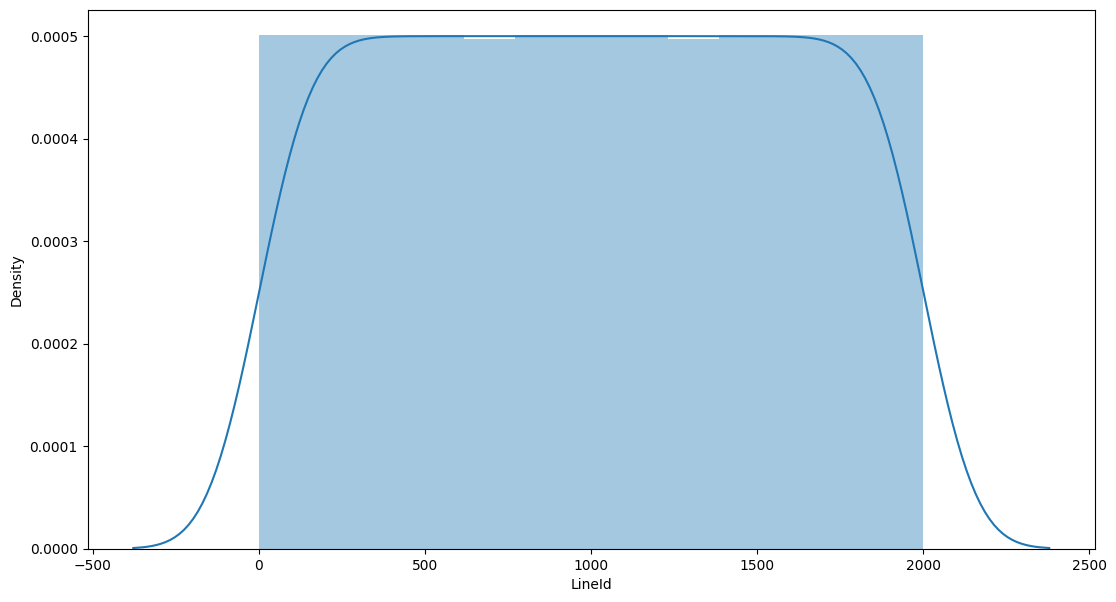

<ipython-input-30-9c23c447035a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


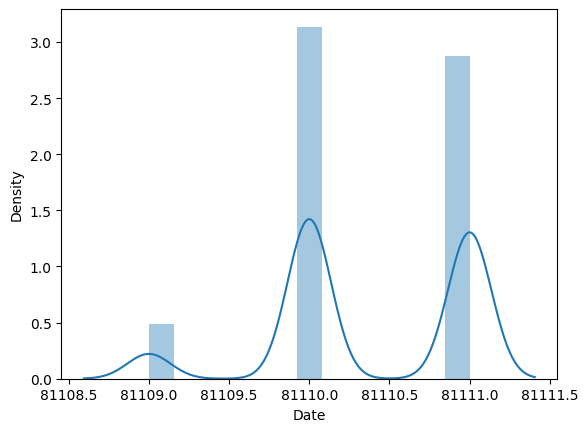

<ipython-input-30-9c23c447035a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


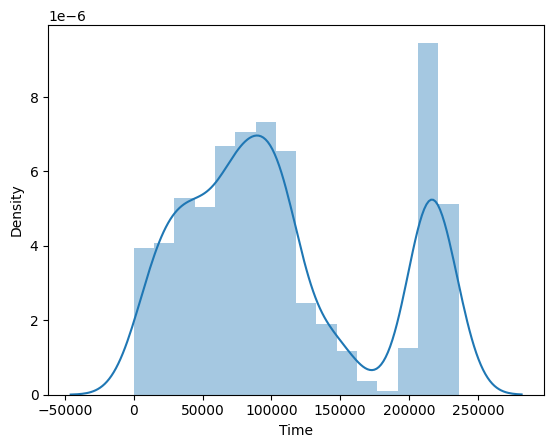

<ipython-input-30-9c23c447035a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logs[i])


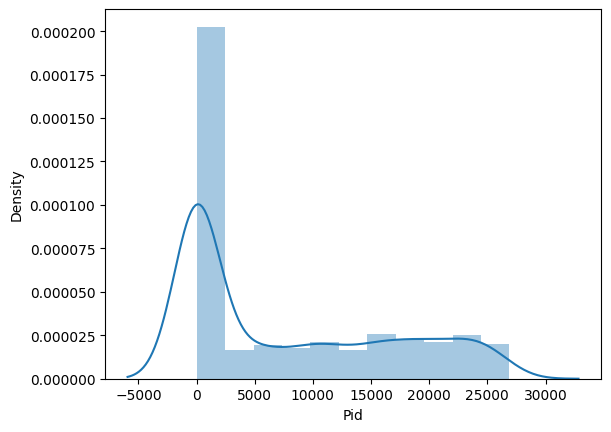

In [30]:
#visiualisation des variable numerique avec displot de seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))

for i in logs_num.columns:
    sns.distplot(logs[i])
    plt.show()


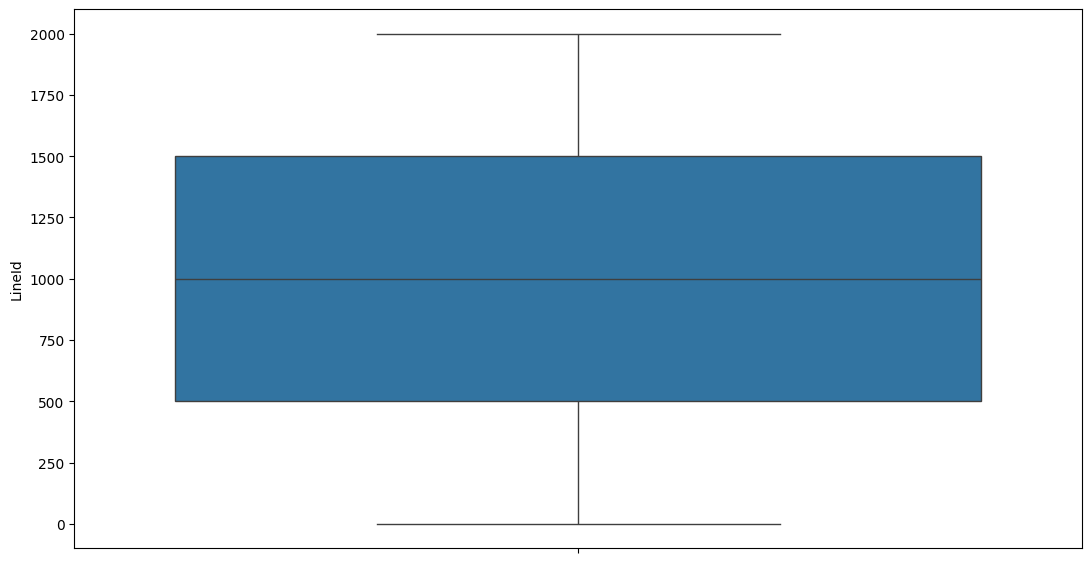

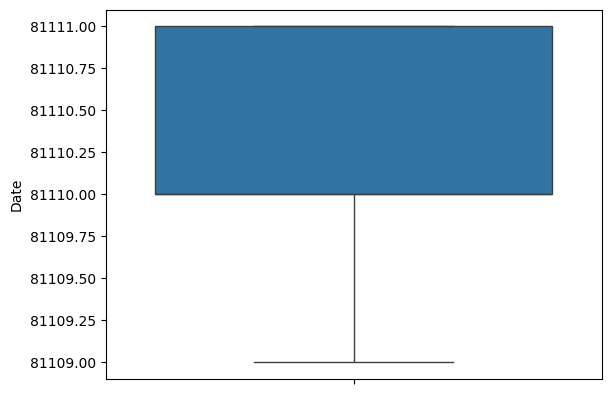

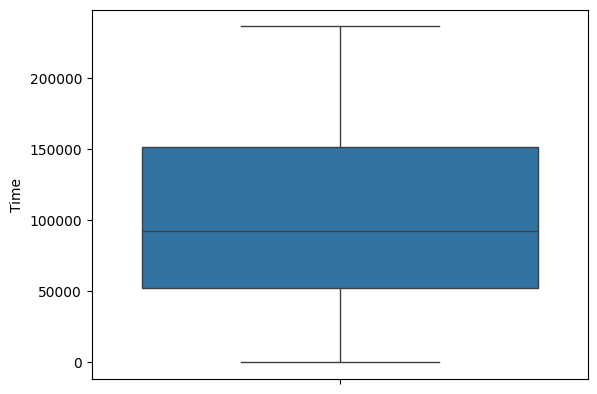

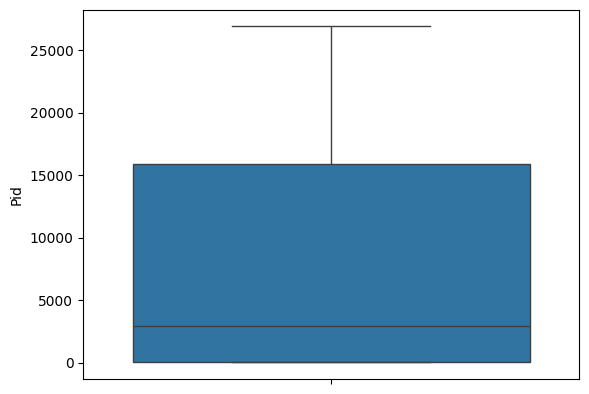

In [31]:
#visiualisation des variable numerique avec displot de seaborn

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 7))

for i in logs_num.columns:
    sns.boxplot(logs[i])
    plt.show()

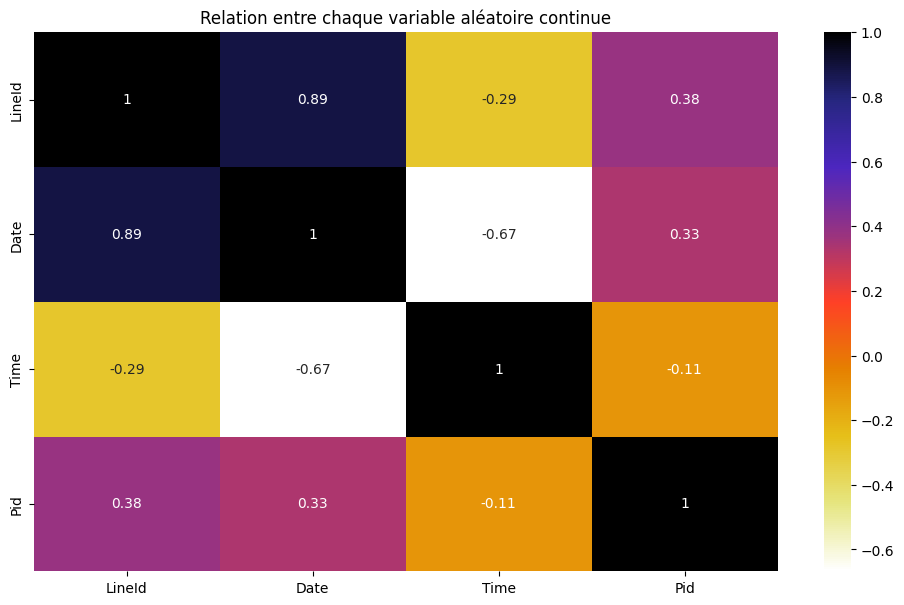

In [32]:
# Affichage de la corrélation entre les variables numériques à l'aide d'une carte thermique

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
cor = logs_num.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Relation entre chaque variable aléatoire continue')
plt.show()